In [1]:
import tensorflow as tf


In [2]:
#!pip install scikit-learn
#!pip install tensorflow_datasets
#!pip install matplotlib

In [3]:
import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [4]:
tf.random.set_seed(1)
np.random.seed(1)

In [5]:
X = np.random.uniform(  low=-1, high=1, size=(200, 2)   )

In [6]:
X.shape

(200, 2)

In [7]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [8]:
y = np.ones(   len(X)    ) 

In [9]:
y.shape

(200,)

In [10]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
## XOR data

## comparing column 0 and 1 and seperating the + + , - - and the + -, - +

y[  X[:, 0] * X[:, 1] < 0   ] = 0

In [12]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [13]:
print(y.shape)
print(X.shape)

(200,)
(200, 2)


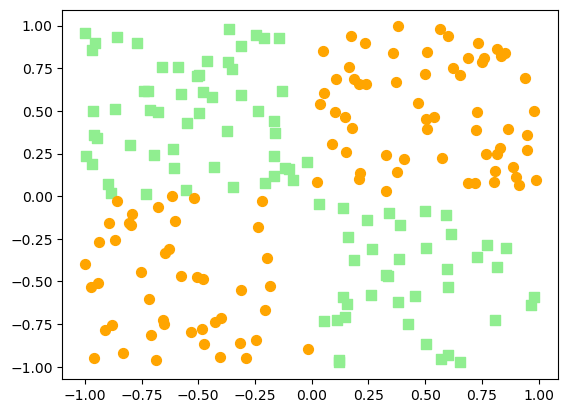

In [14]:
## plt.scatter(X[:, 0], X[:, 1] )


plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='class0')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='orange',
            marker='o',
            label='class1')
plt.show()

In [15]:
X_train = X[:100, :]
y_train = y[:100]

X_test  = X[100:, :]
y_test  = y[100:]

In [16]:
## DNN ## units and activiation can change for hwand amount of layers

model = tf.keras.Sequential()
model.add(  tf.keras.layers.Dense(units=40, input_shape=(2,), activation='relu'))
model.add(  tf.keras.layers.Dense(units=40, activation='relu'))
model.add(  tf.keras.layers.Dense(units=40, activation='relu'))
model.add(  tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                120       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,441
Trainable params: 3,441
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
                optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[   tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.PrecisionAtRecall(1)    ]

             )

In [19]:
hist = model.fit(
                    X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs=300,
                    batch_size=2,
                    verbose=1

                )

Epoch 1/300
50/50 [==============================] - 1s 10ms/step - loss: 0.6765 - binary_accuracy: 0.6400 - precision: 1.0000 - recall: 0.3208 - precision_at_recall: 0.5300 - val_loss: 0.6462 - val_binary_accuracy: 0.8900 - val_precision: 1.0000 - val_recall: 0.7925 - val_precision_at_recall: 0.8281
Epoch 2/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6085 - binary_accuracy: 0.9400 - precision: 1.0000 - recall: 0.8868 - precision_at_recall: 0.6625 - val_loss: 0.5713 - val_binary_accuracy: 0.9400 - val_precision: 1.0000 - val_recall: 0.8868 - val_precision_at_recall: 0.9298
Epoch 3/300
50/50 [==============================] - 0s 3ms/step - loss: 0.4984 - binary_accuracy: 0.9400 - precision: 1.0000 - recall: 0.8868 - precision_at_recall: 0.8689 - val_loss: 0.4403 - val_binary_accuracy: 0.9700 - val_precision: 0.9630 - val_recall: 0.9811 - val_precision_at_recall: 0.9464
Epoch 4/300
50/50 [==============================] - 0s 4ms/step - loss: 0.3442 - binary_accurac

50/50 [==============================] - 0s 3ms/step - loss: 0.0195 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 0.9464
Epoch 29/300
50/50 [==============================] - 0s 3ms/step - loss: 0.0161 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0576 - val_binary_accuracy: 0.9800 - val_precision: 0.9636 - val_recall: 1.0000 - val_precision_at_recall: 0.9636
Epoch 30/300
50/50 [==============================] - 0s 3ms/step - loss: 0.0176 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0683 - val_binary_accuracy: 0.9800 - val_precision: 0.9636 - val_recall: 1.0000 - val_precision_at_recall: 0.9636
Epoch 31/300
50/50 [==============================] - 0s 3ms/step - loss: 0.0156 - binary_accuracy: 1.0000 

50/50 [==============================] - 0s 3ms/step - loss: 0.0045 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0695 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 56/300
50/50 [==============================] - 0s 3ms/step - loss: 0.0063 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9800 - val_precision: 0.9636 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 57/300
50/50 [==============================] - 0s 3ms/step - loss: 0.0036 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0549 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 58/300
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - binary_accuracy: 1.0000 

50/50 [==============================] - 0s 4ms/step - loss: 0.0013 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0559 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 83/300
50/50 [==============================] - 0s 4ms/step - loss: 0.0014 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0433 - val_binary_accuracy: 0.9800 - val_precision: 0.9636 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 84/300
50/50 [==============================] - 0s 4ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 85/300
50/50 [==============================] - 0s 4ms/step - loss: 0.0012 - binary_accuracy: 1.0000 

Epoch 109/300
50/50 [==============================] - 0s 3ms/step - loss: 4.4488e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0543 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 110/300
50/50 [==============================] - 0s 3ms/step - loss: 3.7096e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0718 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 111/300
50/50 [==============================] - 0s 3ms/step - loss: 3.8231e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0661 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 112/300
50/50 [==============================] - 0s 3ms/step - loss: 3.29

Epoch 136/300
50/50 [==============================] - 0s 4ms/step - loss: 1.3919e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0701 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 137/300
50/50 [==============================] - 0s 4ms/step - loss: 1.3811e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0699 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 138/300
50/50 [==============================] - 0s 4ms/step - loss: 1.3595e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0705 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 139/300
50/50 [==============================] - 0s 4ms/step - loss: 1.43

Epoch 163/300
50/50 [==============================] - 0s 3ms/step - loss: 5.9125e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0618 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 164/300
50/50 [==============================] - 0s 4ms/step - loss: 6.4608e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 165/300
50/50 [==============================] - 0s 4ms/step - loss: 5.9134e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 166/300
50/50 [==============================] - 0s 3ms/step - loss: 5.56

Epoch 190/300
50/50 [==============================] - 0s 3ms/step - loss: 2.2231e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0695 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 191/300
50/50 [==============================] - 0s 3ms/step - loss: 2.2326e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 192/300
50/50 [==============================] - 0s 3ms/step - loss: 2.3096e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0622 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 193/300
50/50 [==============================] - 0s 3ms/step - loss: 1.98

Epoch 217/300
50/50 [==============================] - 0s 3ms/step - loss: 9.0971e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0808 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 218/300
50/50 [==============================] - 0s 4ms/step - loss: 8.6703e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0794 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 219/300
50/50 [==============================] - 0s 4ms/step - loss: 8.2874e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 220/300
50/50 [==============================] - 0s 4ms/step - loss: 8.45

Epoch 244/300
50/50 [==============================] - 0s 4ms/step - loss: 3.9616e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 245/300
50/50 [==============================] - 0s 4ms/step - loss: 3.7628e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 246/300
50/50 [==============================] - 0s 4ms/step - loss: 4.0364e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0830 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 247/300
50/50 [==============================] - 0s 4ms/step - loss: 3.90

Epoch 271/300
50/50 [==============================] - 0s 3ms/step - loss: 1.9536e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0903 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 272/300
50/50 [==============================] - 0s 3ms/step - loss: 1.8541e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0885 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 273/300
50/50 [==============================] - 0s 4ms/step - loss: 1.8139e-06 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0826 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 274/300
50/50 [==============================] - 0s 4ms/step - loss: 1.77

Epoch 298/300
50/50 [==============================] - 0s 3ms/step - loss: 8.7895e-07 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0917 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 299/300
50/50 [==============================] - 0s 4ms/step - loss: 8.4280e-07 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0912 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000
Epoch 300/300
50/50 [==============================] - 0s 3ms/step - loss: 8.0703e-07 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - precision_at_recall: 1.0000 - val_loss: 0.0900 - val_binary_accuracy: 0.9700 - val_precision: 0.9464 - val_recall: 1.0000 - val_precision_at_recall: 1.0000


In [20]:
print(hist.history.keys())

dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'precision_at_recall', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall', 'val_precision_at_recall'])


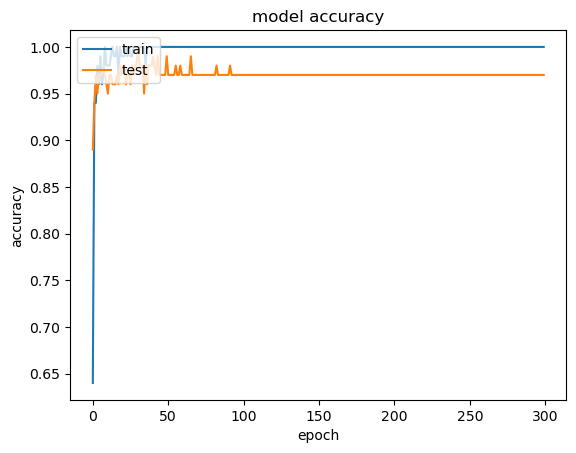

In [21]:
history = hist


# summarize history for accuracy

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

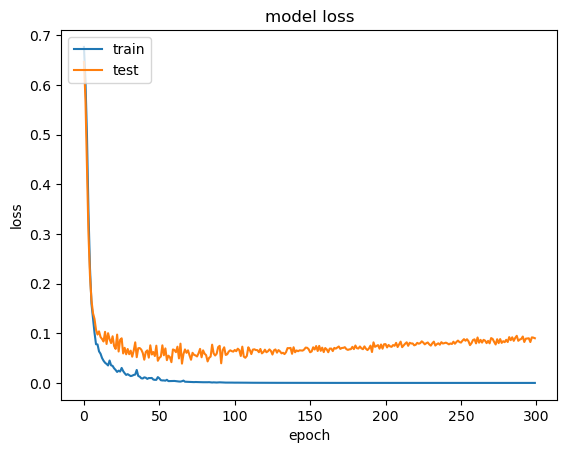

In [22]:
history = hist

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

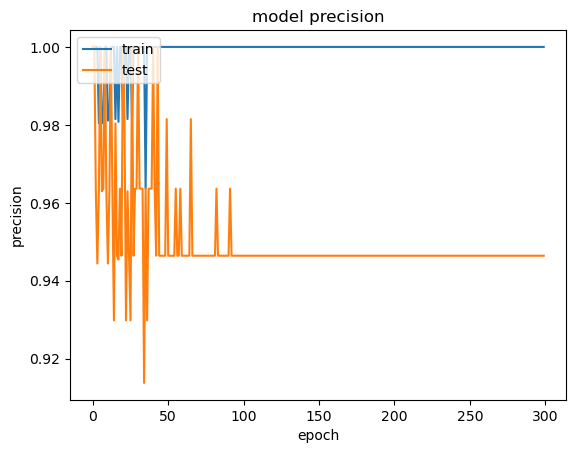

In [23]:
history = hist


# summarize history for accuracy

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

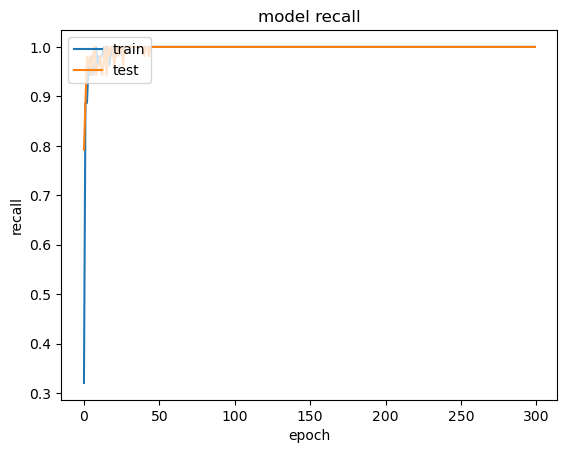

In [24]:
history = hist


# summarize history for accuracy

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

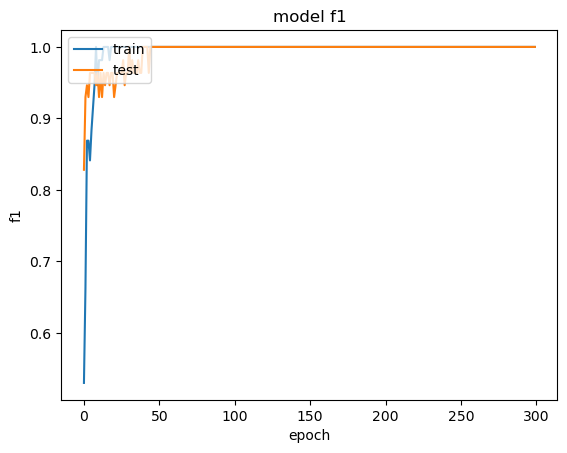

In [25]:
history = hist


# summarize history for accuracy

plt.plot(history.history['precision_at_recall'])
plt.plot(history.history['val_precision_at_recall'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model.save('modelJPXOR.h5')